In [5]:
'''Logistic Regression'''

'Logistic Regression'

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head(10)

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [43]:
# Calculate median for 'RestingBP' and 'Cholesterol'
median_RestingBP = df['RestingBP'].median()
median_Cholesterol = df['Cholesterol'].median()

# Replace NaNs with the median
df['RestingBP'].fillna(median_RestingBP, inplace=True)
df['Cholesterol'].fillna(median_Cholesterol, inplace=True)

df.isnull().sum() / df.shape[0]

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [44]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

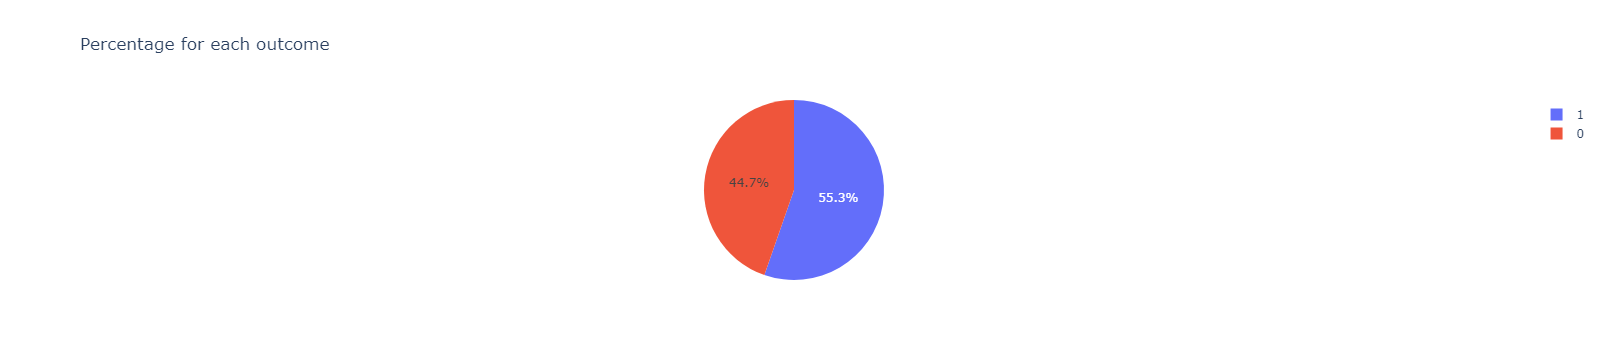

In [45]:
fig = px.pie(df, names='HeartDisease', title='Percentage for each outcome')
fig.update_layout(width=500, height=300)
fig.show()

In [46]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [47]:
df.groupby(['HeartDisease', 'Sex'])[['Age']].describe().T

HeartDisease           0                      1            
Sex                    F           M          F           M
Age count     143.000000  267.000000  50.000000  458.000000
    mean       51.202797   50.202247  56.180000   55.868996
    std         9.627981    9.344911   8.220656    8.788562
    min        30.000000   28.000000  33.000000   31.000000
    25%        44.000000   42.000000  51.000000   51.000000
    50%        51.000000   51.000000  58.000000   57.000000
    75%        57.000000   57.000000  62.000000   62.000000
    max        76.000000   75.000000  73.000000   77.000000

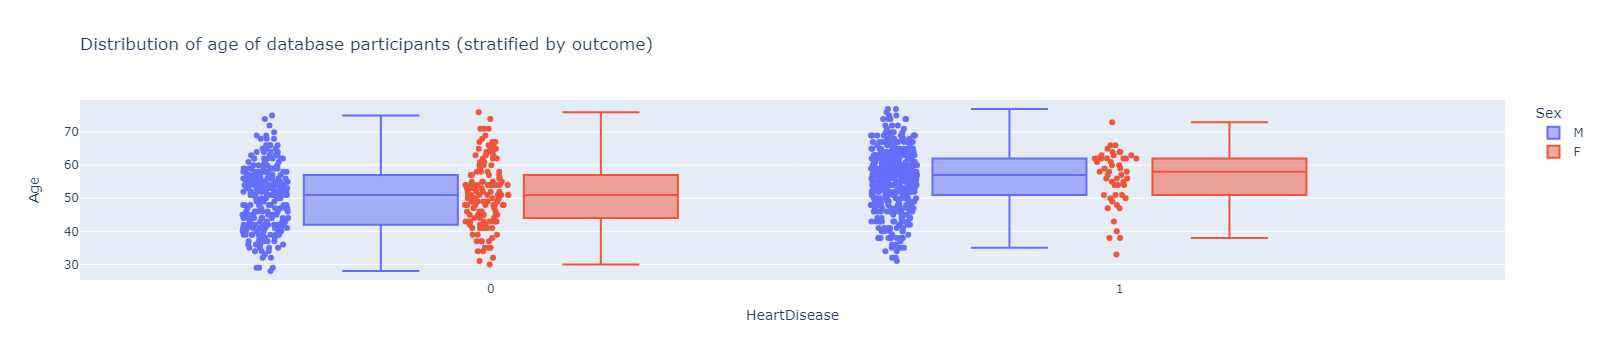

In [48]:
fig = px.box(df, y="Age", x="HeartDisease", points="all",  color="Sex",
             title="Distribution of age of database participants (stratified by outcome)")
fig.show()

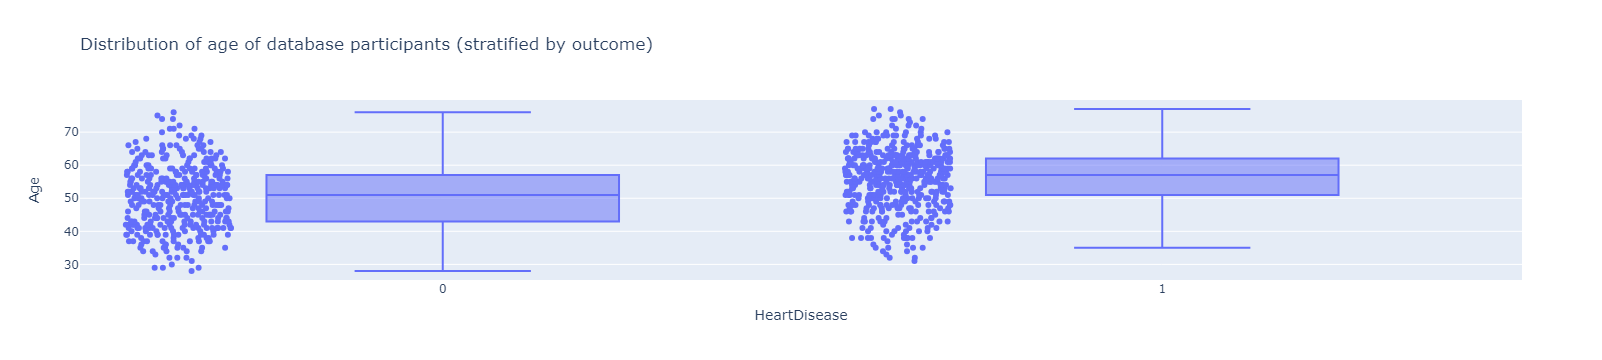

In [49]:
fig = px.box(df, y="Age", x="HeartDisease", points="all", 
             title="Distribution of age of database participants (stratified by outcome)")

fig.show()

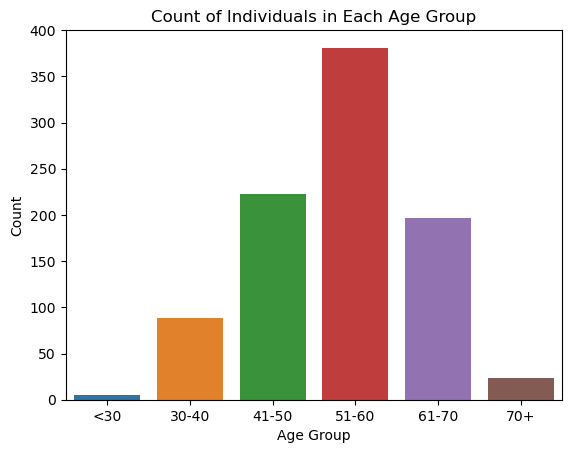

In [50]:
unique_ages = df['Age'].unique()

bins = [0, 30, 40, 50, 60, 70, float('inf')]
labels = ['<30', '30-40', '41-50', '51-60', '61-70', '70+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

sns.countplot(x='AgeGroup', data=df)
plt.title("Count of Individuals in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

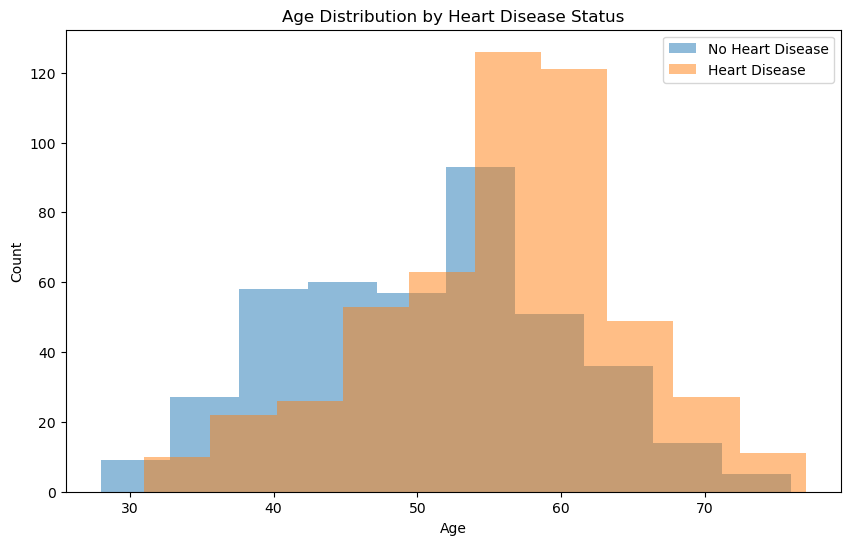

In [51]:
df_no_disease = df[df['HeartDisease'] == 0]
df_with_disease = df[df['HeartDisease'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df_no_disease['Age'], alpha=0.5, label='No Heart Disease')
plt.hist(df_with_disease['Age'], alpha=0.5, label='Heart Disease')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [52]:
df_copy = df.copy()
df_copy['c'] = 1
df_copy.groupby(['HeartDisease', 'Sex']).agg('count')[['c']]

c
HeartDisease Sex     
0            F    143
             M    267
1            F     50
             M    458

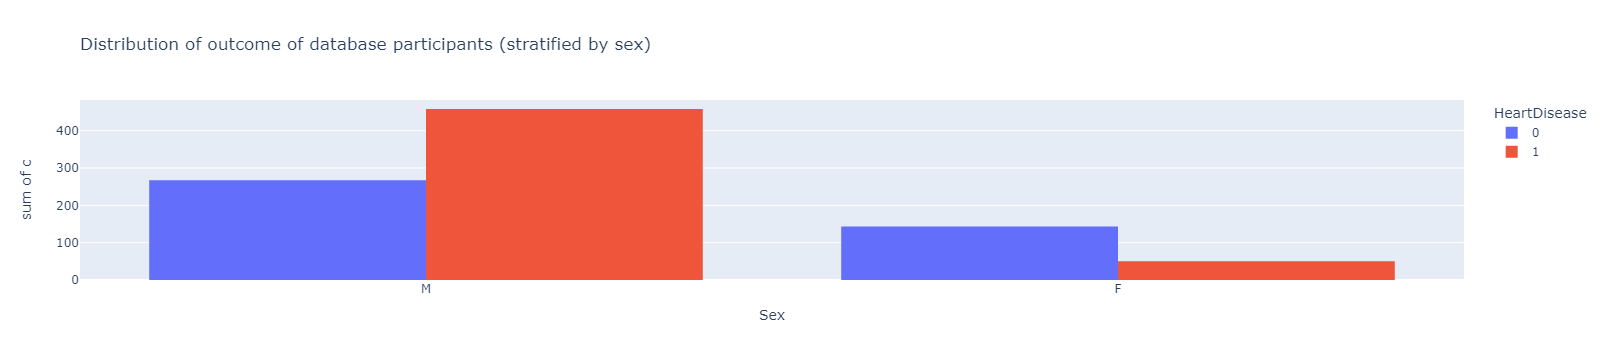

In [53]:
fig = px.histogram(df_copy, x="Sex", y="c",
             color='HeartDisease', barmode='group',
             title="Distribution of outcome of database participants (stratified by sex)")
fig.update_layout(width=700, height=300)

fig.show()

# Data Cleaning and Preprocessing

In [54]:
X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']

sex = df.pop("Sex") # Pop function drops and assigns at the same time
df.head(10)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,30-40
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,41-50
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,30-40
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,41-50
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,51-60
5,39,NAP,120,339,0,Normal,170,N,0.0,Up,0,30-40
6,45,ATA,130,237,0,Normal,170,N,0.0,Up,0,41-50
7,54,ATA,110,208,0,Normal,142,N,0.0,Up,0,51-60
8,37,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,30-40
9,48,ATA,120,284,0,Normal,120,N,0.0,Up,0,41-50


In [55]:
numeric_features = ["Age", "RestingBP", "Cholesterol", "Oldpeak", "RestingBP", "MaxHR", "Oldpeak"]
X[numeric_features][:5]


,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,40,140,289,0.0,140,172,0.0
1,49,160,180,1.0,160,156,1.0
2,37,130,283,0.0,130,98,0.0
3,48,138,214,1.5,138,108,1.5
4,54,150,195,0.0,150,122,0.0


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[numeric_features] = scaler.fit_transform(X[numeric_features])
data = X[numeric_features]
X_num = pd.DataFrame(data, columns=numeric_features)
X_num[:5]

,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,-0.832432,0.410909,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.105664,1.491752,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.832432,-0.129513,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,0.574711,0.302825,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.832432,0.951331,-0.581981,-0.832432


In [57]:
categorical_features = ["ChestPainType", "RestingECG", "ST_Slope"]
X[categorical_features][:5]

,ChestPainType,RestingECG,ST_Slope
0,ATA,Normal,Up
1,NAP,Normal,Flat
2,ATA,ST,Up
3,ASY,Normal,Flat
4,NAP,Normal,Up


In [58]:
binary_features = ["Sex", "FastingBS", "ExerciseAngina"]
X[binary_features][:5]

,Sex,FastingBS,ExerciseAngina
0,M,0,N
1,F,0,N
2,M,0,N
3,F,0,Y
4,M,0,N


In [59]:
from sklearn.preprocessing import OrdinalEncoder

binary_transformer = OrdinalEncoder()

data = binary_transformer.fit_transform(X[binary_features])
X_bin = pd.DataFrame(data, columns=binary_features)
X_bin[:5]

,Sex,FastingBS,ExerciseAngina
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [60]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
data = categorical_transformer.fit_transform(X[categorical_features]).toarray()
cols = categorical_transformer.get_feature_names_out()
X_cat = pd.DataFrame(data, columns=cols)
X_cat[:5]

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
X_data = pd.concat([X_cat, X_bin, X_num], axis = 1)
X_data[:5]

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex,FastingBS,ExerciseAngina,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.433140,0.410909,0.825070,-0.832432,0.410909,1.382928,-0.832432
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.478484,1.491752,-0.171961,0.105664,1.491752,0.754157,0.105664
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.751359,-0.129513,0.770188,-0.832432,-0.129513,-1.525138,-0.832432
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.584556,0.302825,0.139040,0.574711,0.302825,-1.132156,0.574711
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.051881,0.951331,-0.034755,-0.832432,0.951331,-0.581981,-0.832432


# Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

# sensitive_attributes = X_data[['Sex', 'Age']]
sensitive_attributes = X_data['Sex']

x_train, x_test, y_train, y_test, sa_train, sa_test = train_test_split(X_data, y, sensitive_attributes, test_size=0.2, random_state=42)

# Model Training

## HyperParameter Tuning

Logistic Regression doesn't really have hyper-parameter tuning, but we checked if adding a penality would help the model 

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameter_grid = {
    'penalty': ['none', 'l2'], # Penalty 
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
}

logistic = LogisticRegression() 
grid_search = GridSearchCV(logistic, parameter_grid, cv=5)
#logistic.fit(x_train, y_train) 
grid_search.fit(x_train, y_train)

print("Best Parameters Found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\16142\anacon

Best Parameters Found:  {'C': 0.1, 'penalty': 'l2'}


C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\16142\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\16142\anacon

## Fitting the model 

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logistic = LogisticRegression(penalty = 'l2', C=0.1)

# Train the model
logistic.fit(x_train, y_train)
y_train_pred = logistic.predict(x_train) 
y_test_pred = logistic.predict(x_test) 

print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
 [[68  9]
 [19 88]]
Accuracy: 0.8478260869565217


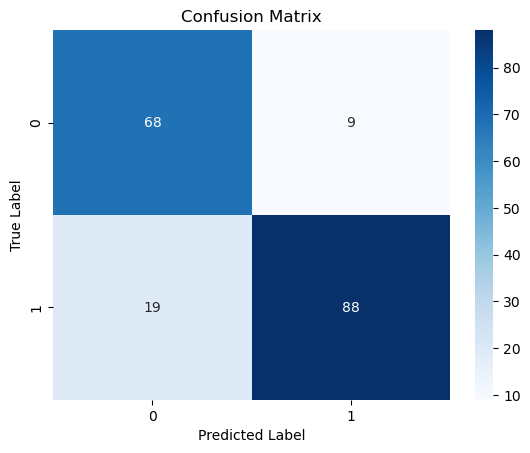

In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

True Negatives: 68

True Positives: 88

False Negatives: 9

False Positives: 19

In [82]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'selection_rate': selection_rate
}

mf = MetricFrame(metrics, y_true=y_test, y_pred=y_test_pred, sensitive_features=sa_test)

# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Overall Metrics:
 accuracy          0.847826
precision         0.907216
recall            0.822430
f1                0.862745
selection_rate    0.527174
dtype: float64

Metrics by Group:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.777778   0.625000  0.625000  0.625000        0.296296
1.0  0.859873   0.932584  0.838384  0.882979        0.566879

Disparities:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.917379   0.688920  0.759943  0.724432        0.562047
1.0  1.014209   1.027962  1.019399  1.023453        1.075317


C:\Users\16142\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



Performance Metrics: 
- Accuracy (84.78%): The model is able to correctly identify heart disease status in 84 out of 100 cases 
- Percision (90.72%): When the model predicts heart disease, there is a 90.72% chance they actually have heart disease 
- Recall (82.24%): Correctly identifies 82.24% of heart disease 
- F1 Score (86.27%): A good balance between precision and recall 
- Selection Rate (52.17%): 52% of predictions are positive for heart disease 

Female (Sex = 0.0), Metrics by Group 
- Accuracy: 77.78% 
- Precision: 62.50%
- Recall: 62.50%
- F1: 62.50%
- Selection Rate: 29.63% 

Male (Sex = 1.0), Metrics by Group 
- Accuracy: 86.00% 
- Precision: 93.26%
- Recall: 83.83%
- F1: 88.30%
- Selection Rate: 56.69% 

Female (Sex = 0.0), Disparities 
- All metrics are below 1, meaning the model underperforms for females 

Male (Sex = 1.0), Disparities 
- All metrics are above 1, meaning the model performs better for males 


In [83]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference, demographic_parity_ratio, equalized_odds_ratio

dpd = demographic_parity_difference(y_test, y_test_pred, sensitive_features = sa_test)
eod = equalized_odds_difference(y_test, y_test_pred, sensitive_features = sa_test)
dpr = demographic_parity_ratio(y_test, y_test_pred, sensitive_features = sa_test)
eqr = equalized_odds_ratio(y_test, y_test_pred, sensitive_features=sa_test)

print("Demographic parity difference: {}".format(round(dpd, 2)))
print("Equalized odds difference: {}".format(round(eod, 2)))
print("Demographic parity ratio: {}".format(round(dpr, 2)))
print(f'Value of equal odds ratio: {round(eqr, 2)}')

Demographic parity difference: 0.27
Equalized odds difference: 0.21
Demographic parity ratio: 0.52
Value of equal odds ratio: 0.66


# Bias Reduction

## Using ExponentiatedGradient with DemographicParity

In [89]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

logistic = LogisticRegression(penalty='l2', C=0.1)
dp = DemographicParity()
dt_classifier_reduction = ExponentiatedGradient(logistic, dp)

dt_classifier_reduction.fit(x_train, y_train, sensitive_features=sa_train)
prediction_dp = dt_classifier_reduction.predict(x_test)

In [101]:
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_test_pred, sensitive_features=sa_test)
print(sr_mitigated.overall)

0.5271739130434783


In [103]:
print(sr_mitigated.by_group)

Sex
0.0    0.296296
1.0    0.566879
Name: selection_rate, dtype: float64


In [104]:
gm = MetricFrame(metrics=accuracy_score, y_true=y_test, y_pred=y_test_pred, sensitive_features=sa_test)
print(gm.overall)

0.8478260869565217


In [106]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'selection_rate': selection_rate
}

mf = MetricFrame(metrics, y_true=y_test, y_pred=prediction_dp, sensitive_features=sa_test)


print("Fairness metrics by demographic parity\n")
# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Fairness metrics by demographic parity

Overall Metrics:
 accuracy          0.809783
precision         0.867347
recall            0.794393
f1                0.829268
selection_rate    0.532609
dtype: float64

Metrics by Group:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.740741   0.533333  1.000000  0.695652        0.555556
1.0  0.821656   0.927711  0.777778  0.846154        0.528662

Disparities:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.914740   0.614902  1.258824  0.838875        1.043084
1.0  1.014663   1.069596  0.979085  1.020362        0.992591


C:\Users\16142\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



Performance Metrics: 
- Accuracy (80.98%): The model is able to correctly identify heart disease status in 81 out of 100 cases 
- Percision (86.73%): When the model predicts heart disease, there is a 86.73% chance they actually have heart disease 
- Recall (79.44%): Correctly identifies 79.44% of heart disease 
- F1 Score (82.93%): A good balance between precision and recall 
- Selection Rate (53.26%): 53% of predictions are positive for heart disease 

Female (Sex = 0.0), Metrics by Group 
- Accuracy: 74.07% 
- Precision: 53.33%
- Recall: 1.00%
- F1: 69.56%
- Selection Rate: 55.56% 

Male (Sex = 1.0), Metrics by Group 
- Accuracy: 82.17% 
- Precision: 92.77%
- Recall: 77.78%
- F1: 84.61%
- Selection Rate: 52.87% 

Female (Sex = 0.0), Disparities 
- The model underperforms in accuracy, percision, and f1 for females
- The model performs well in recall and selection rate 

Male (Sex = 1.0), Disparities 
- The opposite is true for men 
- The model underperforms in recall and selection rate 
- The model performs well in accuracy, precision, and f1 

## Using ExponentiatedGradient with EqualizedOdds 

In [108]:
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds

# Use EqualizedOdds instead of DemographicParity
eo = EqualizedOdds()

logistic = LogisticRegression(penalty = 'l2', C=0.1)

# Apply ExponentiatedGradient with EqualizedOdds
eg_classifier_eo = ExponentiatedGradient(logistic, eo)
eg_classifier_eo.fit(x_train, y_train, sensitive_features=sa_train)
prediction_eo = eg_classifier_eo.predict(x_test)

In [111]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'selection_rate': selection_rate
}

mf = MetricFrame(metrics, y_true=y_test, y_pred=prediction_eo, sensitive_features=sa_test)


print("Fairness metrics by equalized odds\n")
# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Fairness metrics by equalized odds

Overall Metrics:
 accuracy          0.826087
precision         0.894737
recall            0.794393
f1                0.841584
selection_rate    0.516304
dtype: float64

Metrics by Group:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.740741   0.555556  0.625000  0.588235        0.333333
1.0  0.840764   0.930233  0.808081  0.864865        0.547771

Disparities:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.896686   0.620915  0.786765  0.698962        0.645614
1.0  1.017767   1.039672  1.017231  1.027663        1.060945


C:\Users\16142\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



Performance Metrics: 
- Accuracy (82.61%): The model is able to correctly identify heart disease status in 84 out of 100 cases 
- Percision (89.47%): When the model predicts heart disease, there is a 90.72% chance they actually have heart disease 
- Recall (79.44%): Correctly identifies 82.24% of heart disease 
- F1 Score (84.16%): A good balance between precision and recall 
- Selection Rate (51.63%): 52% of predictions are positive for heart disease 

Female (Sex = 0.0), Metrics by Group 
- Accuracy: 74.07% 
- Precision: 55.56%
- Recall: 62.50%
- F1: 58.82%
- Selection Rate: 33.33% 

Male (Sex = 1.0), Metrics by Group 
- Accuracy: 84.08% 
- Precision: 93.02%
- Recall: 80.80%
- F1: 86.48%
- Selection Rate: 54.78% 

Female (Sex = 0.0), Disparities 
- All metrics are below 1, meaning the model underperforms for females 

Male (Sex = 1.0), Disparities 
- All metrics are above 1, meaning the model performs better for males 

In [112]:
dpd = demographic_parity_difference(y_test, prediction_eo, sensitive_features = sa_test)
eod = equalized_odds_difference(y_test, prediction_eo, sensitive_features = sa_test)
dpr = demographic_parity_ratio(y_test, prediction_eo, sensitive_features = sa_test)

print("Demographic parity difference: {}".format(round(dpd, 2)))
print("Equalized odds difference: {}".format(round(eod, 2)))
print("Demographic parity ratio: {}".format(round(dpr, 2)))

Demographic parity difference: 0.21
Equalized odds difference: 0.18
Demographic parity ratio: 0.61
